# IOR Benchmark Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pprint import pprint

## Configuration

In [2]:
# Color palette
CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}


experiment_dir = "ior/mlds"
experiment = "results.csv"
dataframe = pd.read_csv(f"{experiment_dir}/{experiment}", header=0)

dataframe

,access_type,transfer_size_kib,block_size_gib,bandwidth_mib_sec,iops,latency_sec,total_time_sec
0,sequential_read,128,16,26013,208104.00,0.000610,80.62
1,sequential_read,1024,16,37585,45105.00,0.002797,55.80
2,sequential_read,16384,16,46758,2922.42,0.042181,44.85
3,sequential_read,65536,16,47467,741.69,0.169835,44.18
4,random_read,128,16,25900,207200.00,0.000610,80.97
5,random_read,1024,16,44682,44682.00,0.002824,46.94
6,random_read,16384,16,47357,2959.81,0.042611,44.28
7,random_read,65536,16,47588,743.57,0.171003,44.07
8,sequential_write,128,16,2580,20637.00,0.005809,812.97
9,sequential_write,1024,16,30207,30207.00,0.004069,69.43


## Parameters

* _Tasks_: **128**
* _Clients per node_: **128**
* _Nodes_: **1**
* _Transfer Sizes_: **128 KiB, 1 MiB, 16 MiB, 64 MiB**
* _Block Size_: **16 GiB, 32 GiB**
* _Aggregate Filesize_: **2 TiB, 4 TiB**
* _Access_: **File-per-process**

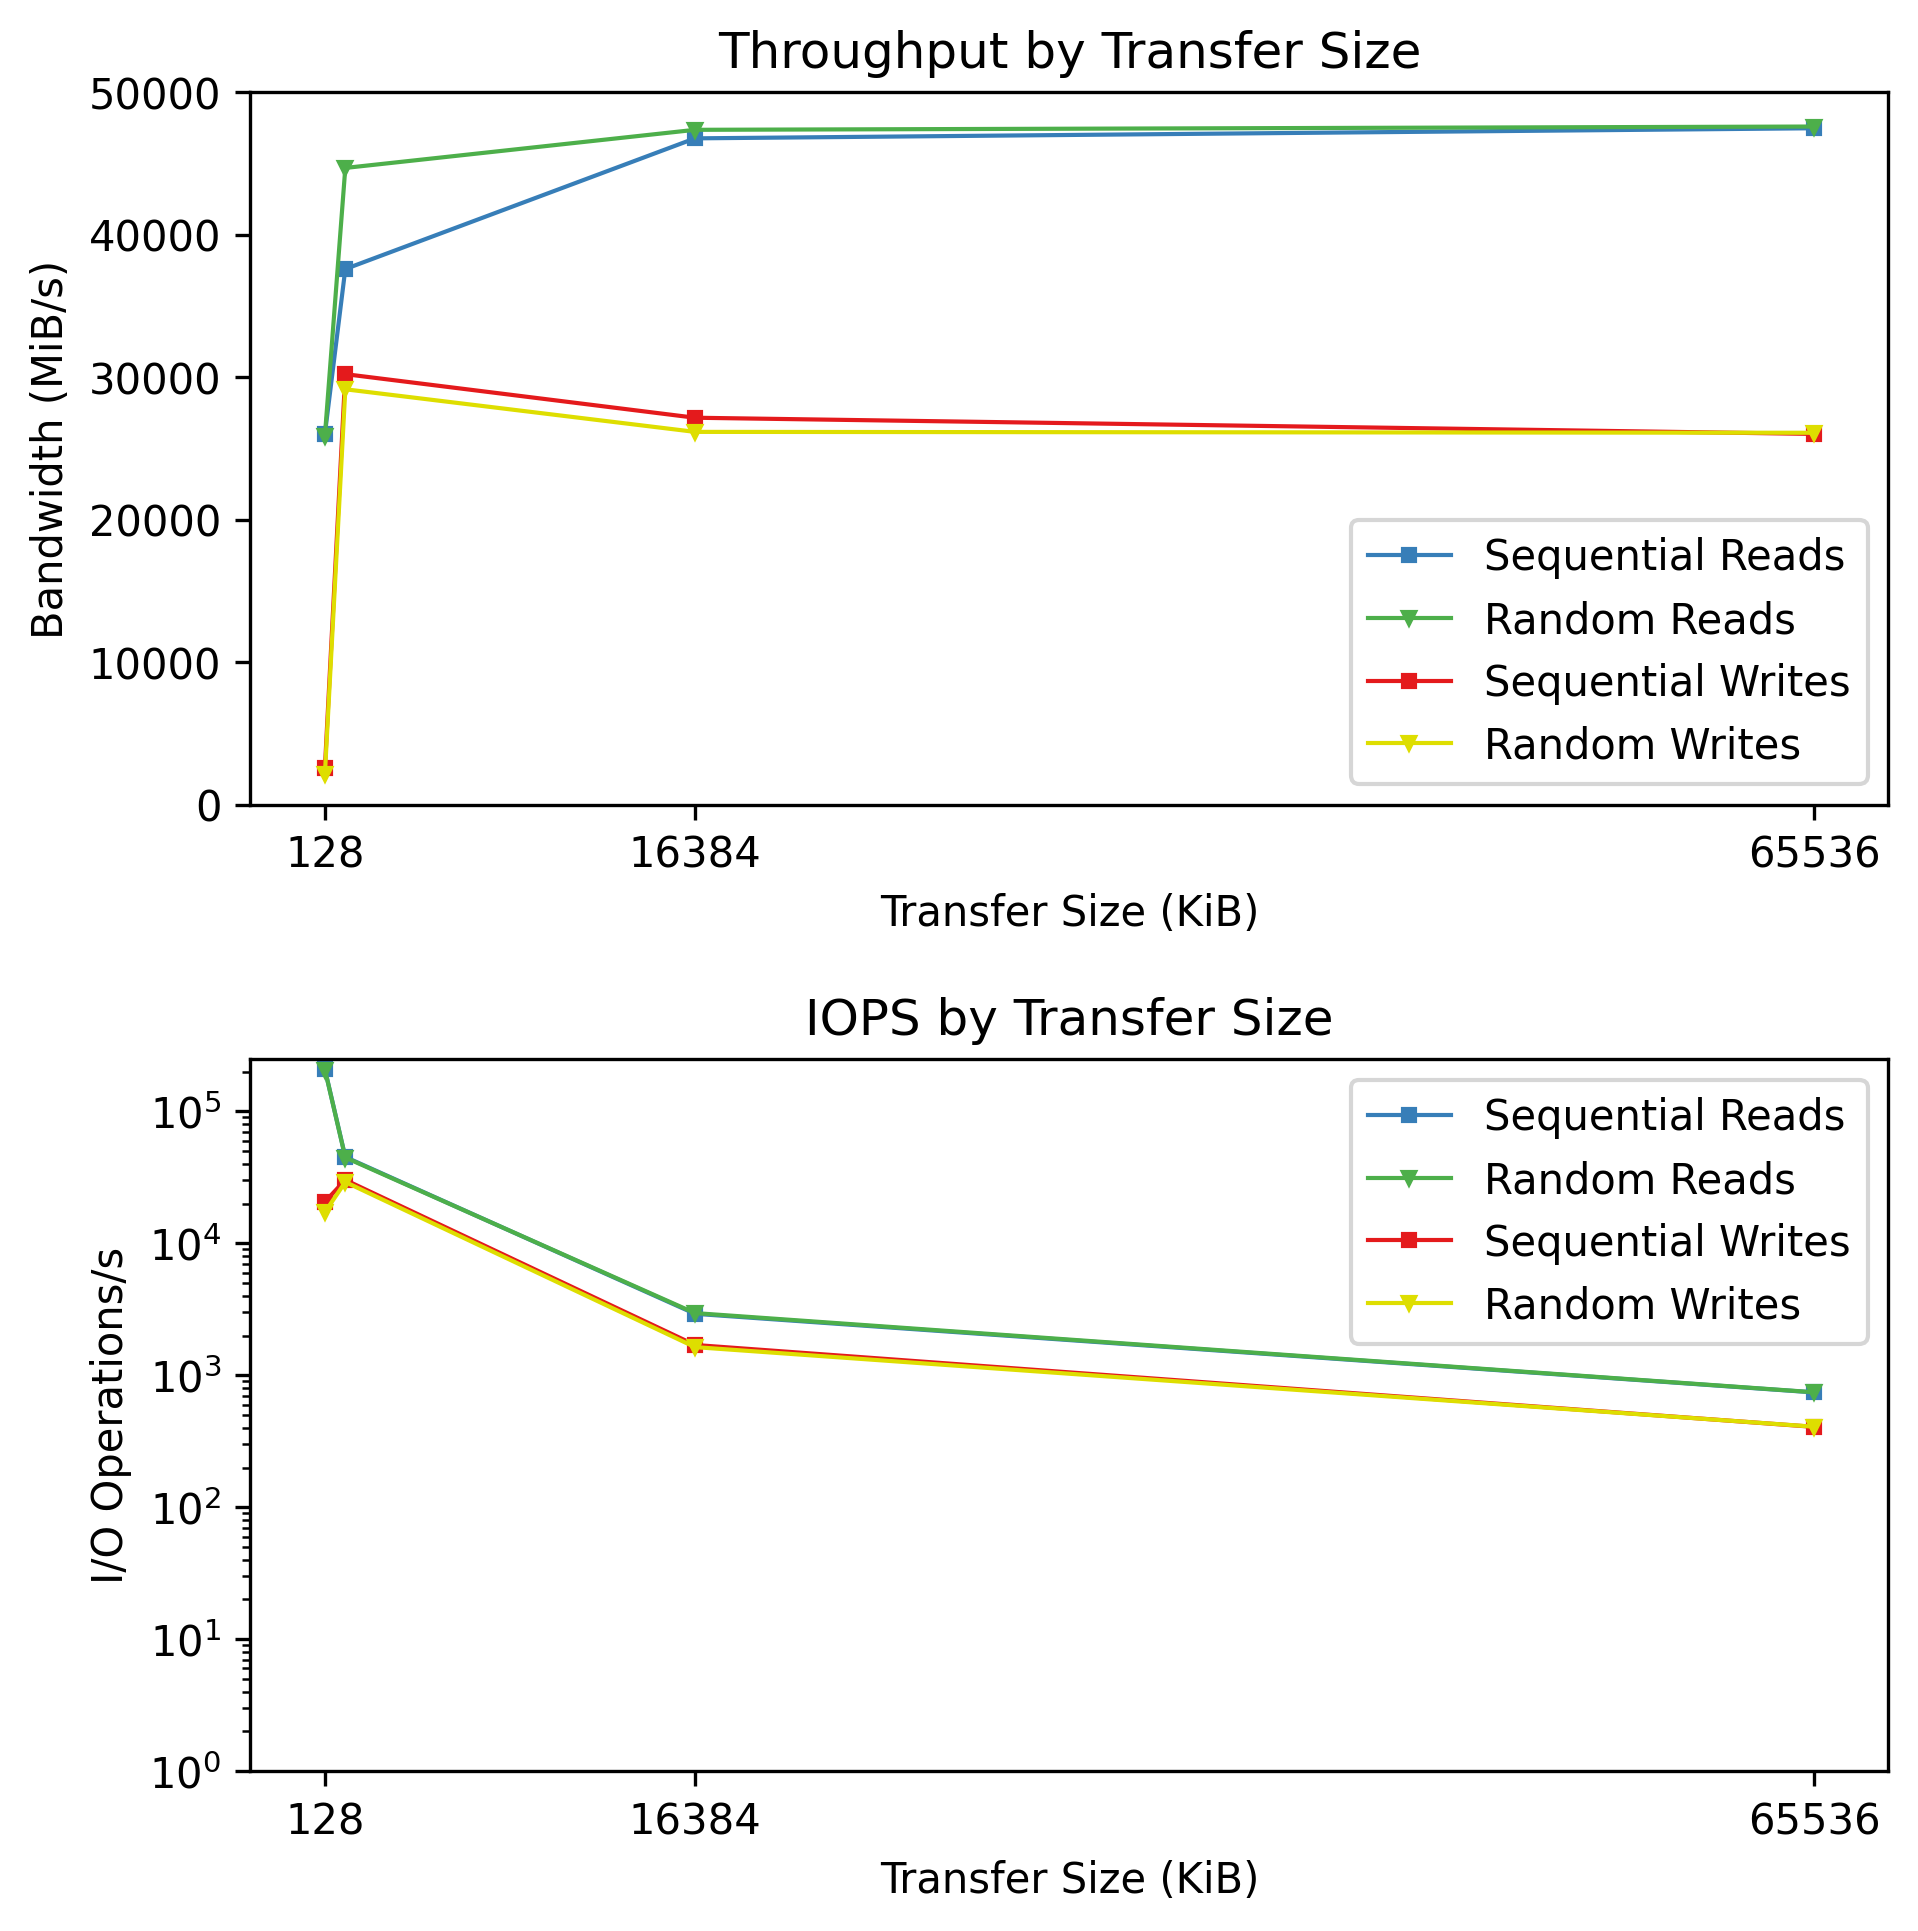

In [3]:
number_rows = 2
number_cols = 1

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(7,7), dpi=300)
fig.tight_layout(pad=4)

seq_reads_df = dataframe.loc[dataframe["access_type"] == "sequential_read"]
seq_writes_df = dataframe.loc[dataframe["access_type"] == "sequential_write"]
rand_reads_df = dataframe.loc[dataframe["access_type"] == "random_read"]
rand_writes_df = dataframe.loc[dataframe["access_type"] == "random_write"]

# Plot throughput
ax[0].plot(
    seq_reads_df["transfer_size_kib"],
    seq_reads_df["bandwidth_mib_sec"],
    lw=1, label="Sequential Reads",
    marker="s", markersize=3,
    color=CB_color_cycle["blue"]
)

ax[0].plot(
    rand_reads_df["transfer_size_kib"],
    rand_reads_df["bandwidth_mib_sec"],
    lw=1, label="Random Reads",
    marker="v", markersize=3,
    color=CB_color_cycle["green"]
)

ax[0].plot(
    seq_writes_df["transfer_size_kib"],
    seq_writes_df["bandwidth_mib_sec"],
    lw=1, label="Sequential Writes",
    marker="s", markersize=3,
    color=CB_color_cycle["red"]
)

ax[0].plot(
    rand_writes_df["transfer_size_kib"],
    rand_writes_df["bandwidth_mib_sec"],
    lw=1, label="Random Writes",
    marker="v", markersize=3,
    color=CB_color_cycle["yellow"]
)

# Plot IOPS
# Plot throughput
ax[1].plot(
    seq_reads_df["transfer_size_kib"],
    seq_reads_df["iops"],
    lw=1, label="Sequential Reads",
    marker="s", markersize=3,
    color=CB_color_cycle["blue"]
)

ax[1].plot(
    rand_reads_df["transfer_size_kib"],
    rand_reads_df["iops"],
    lw=1, label="Random Reads",
    marker="v", markersize=3,
    color=CB_color_cycle["green"]
)

ax[1].plot(
    seq_writes_df["transfer_size_kib"],
    seq_writes_df["iops"],
    lw=1, label="Sequential Writes",
    marker="s", markersize=3,
    color=CB_color_cycle["red"]
)

ax[1].plot(
    rand_writes_df["transfer_size_kib"],
    rand_writes_df["iops"],
    lw=1, label="Random Writes",
    marker="v", markersize=3,
    color=CB_color_cycle["yellow"]
)

ax[0].set_ylim(0, 50000)
ax[0].set_title("Throughput by Transfer Size")
ax[0].set_ylabel("Bandwidth (MiB/s)")
ax[0].set_xlabel("Transfer Size (KiB)")
ax[0].set_xticks([128, 16384, 65536])
ax[0].set_xscale("log", base=2)
ax[0].legend()

ax[1].set_yscale("log")
ax[1].set_ylim(1, 250000)
ax[1].set_title("IOPS by Transfer Size")
ax[1].set_ylabel("I/O Operations/s")
ax[1].set_xlabel("Transfer Size (KiB)")
ax[1].set_xticks([128, 16384, 65536])
ax[1].set_xscale("log", base=2)
ax[1].legend()

plt.savefig("mlds_storage_benchmarks.png", dpi=300)